In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import scipy.ndimage as ndi
import soundfile as sf
import librosa
import math
import pywt
import librosa
import glob
import time
import pickle
import hashlib
import cv2
import os
from collections import Counter
import skimage

import time

from scipy import signal
from scipy import fftpack
import soundfile as sf
from matplotlib import pyplot as plt
from scipy.ndimage.filters import maximum_filter

import modules

C:\Users\user\AppData\Local\Temp\ipykernel_16260\4244071354.py:27: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter


In [3]:
dir_path="imgs/melspec"

In [4]:
%matplotlib inline

plot


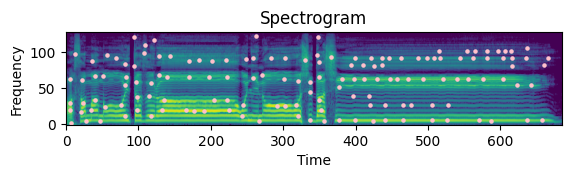

146
plot


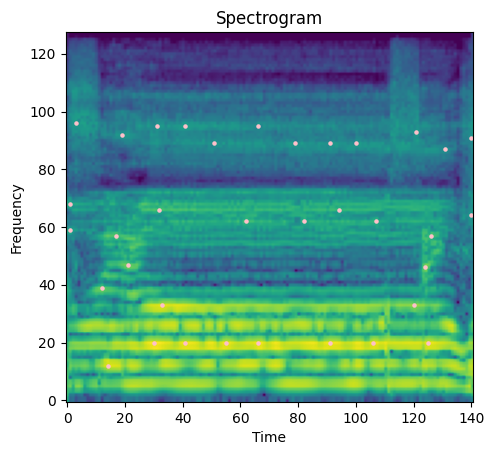

35
hogeghoegh


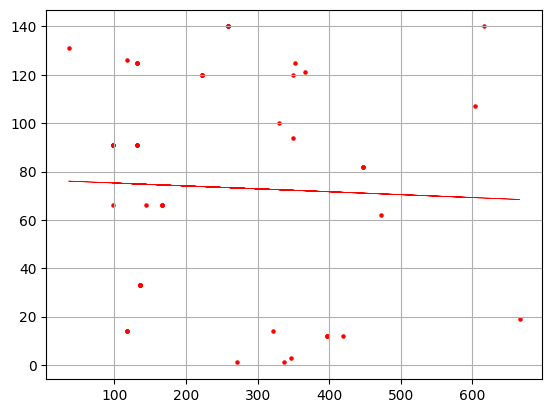

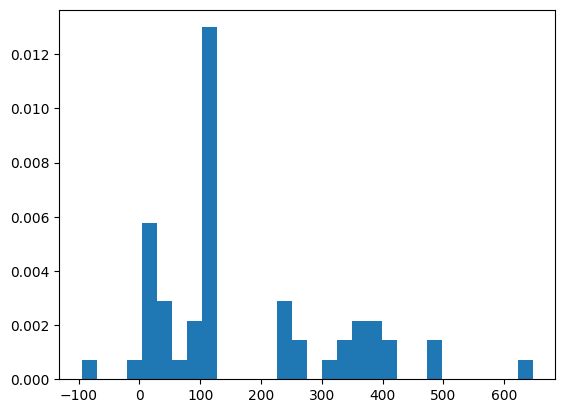

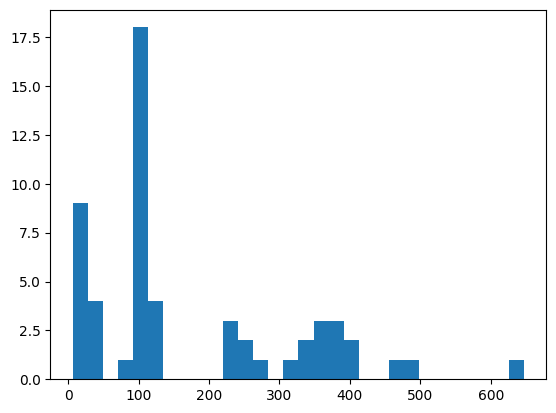

(11.620689655172413, 0.5)

In [84]:
import modules
spec,fs=modules.path2sgram("./data/JKspeech-v_1_0/JKspeech/J01.wav")
# spec=modules.path2cqt2sgram("./data/JKspeech-v_1_0/JKspeech/E01.wav")
x,y=modules.sgram2peaks(spec,amp_min=40,plot=True,PEAK_NEIGHBORHOOD_SIZE=8)
# print(x,y)
hashpeaks,pairs=modules.peaks2hash(x,y)
print(len(x))
spec,fs=modules.path2sgram("data/sample_Q_202205/sample_Q_202205/sample_Q_J02/problem2.wav")
x_,y_=modules.sgram2peaks(spec,amp_min=40,plot=True,PEAK_NEIGHBORHOOD_SIZE=8)
hashpeaks_,pairs_=modules.peaks2hash(x_,y_)
print(len(x_))
modules.hashmatching(hashpeaks,hashpeaks_,graph=True)


In [ ]:

'''
for filename in os.listdir(dir_path):
        base,ext=os.path.splitext(filename)
        path=f"{dir_path}/{filename}"
        if ext=='.png':
                x,y=modules.img2peaks(path)
                hashpeaks,pairs=modules.pairling_peaks(x,y)
                
'''

'\nfor filename in os.listdir(dir_path):\n        base,ext=os.path.splitext(filename)\n        path=f"{dir_path}/{filename}"\n        if ext==\'.png\':\n                x,y=modules.img2peaks(path)\n                hashpeaks,pairs=modules.pairling_peaks(x,y)\n                \n'

In [ ]:
import pickle
def load_pkl(path):
    with open(path, 'rb') as p:
        l = pickle.load(p)
    return l

spec,fs=modules.path2sgram("./data/sample_Q_202205/sample_Q_202205/sample_Q_J01/problem1.wav")
x,y=modules.sgram2peaks(spec,amp_min=50,plot=False)
audio_hash,pairs=modules.peaks2hash(x,y)


lists=load_pkl("db/J/lists_db.pkl")
tmp=dict()
for problem,name in lists:
    # print(i)
    hoge,hoge_=modules.hashmatching(audio_hash,problem)
    tmp[name]=f"{hoge},{hoge_}"
    # print(len(problem_db[i]))
    # print(hoge)
    tmp[name]=hoge

tmp=sorted(tmp.items(),key=lambda x:x[1],reverse=True)



# for i in range(num):
#     print(tmp[i])
# return ans
print(tmp[:30])

c:\Makefiles\procon\2022\高専プロコン競技部門\modules.py:57: FutureWarning: Pass n_fft=512, hop_length=512 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  sgram=np.abs(librosa.stft(wave,n_fft,win_length))


[('J01', 0.022521590183137565), ('J02', 0.015807037058720216), ('J03', 0.01274387397616944), ('J20', 0.010402145530969393), ('J44', 0.010325160613609548), ('J28', 0.009101723738732626), ('J12', 0.008221695603810985), ('J40', 0.007806900204075106), ('J08', 0.007550065598930611), ('J41', 0.007221520129987363), ('J27', 0.00656209648398637), ('J11', 0.006486071693930499), ('J33', 0.005967160942855144), ('J18', 0.005936592143488695), ('J09', 0.005761041997161224), ('J07', 0.005737871804838325), ('J19', 0.005712629879538018), ('J29', 0.005272089230110209), ('J30', 0.005205229369563742), ('J26', 0.005133909472062989), ('J24', 0.004999696988061332), ('J37', 0.0048185030517185964), ('J06', 0.004598651775115235), ('J35', 0.004562935923342679), ('J22', 0.004530994836553796), ('J43', 0.004511435965587188), ('J39', 0.004445291166571422), ('J17', 0.004333560329350587), ('J38', 0.004333560329350586), ('J21', 0.0042797750061139605)]
